In [266]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.svm import SVC
import seaborn as sns
import pickle

In [267]:
dataframe = pd.read_csv('Data/Social_Network_Ads.csv')

In [268]:
dataframe.shape

(400, 5)

In [269]:
dataframe,test = train_test_split(dataframe,test_size= 0.1)

In [270]:
test.to_csv('Data/test.csv')

In [271]:
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
175,15614420,Female,23,28000,0
384,15806901,Female,57,33000,1
6,15598044,Female,27,84000,0
9,15727311,Female,35,65000,0
260,15811177,Female,35,77000,0


In [272]:
# dataframe= dataframe.drop(columns=['User ID','Unnamed: 5'],axis=1)

In [273]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,360.0,1.569139e+07,71282.725835,15569641.0,15628197.25,15693776.0,15749192.75,15815236.0
Age,360.0,3.772222e+01,10.584614,18.0,29.75,37.0,46.00,60.0
EstimatedSalary,360.0,6.977500e+04,34319.357727,15000.0,43000.00,70000.0,87250.00,150000.0
Purchased,360.0,3.555556e-01,0.479348,0.0,0.00,0.0,1.00,1.0


In [274]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 175 to 121
Data columns (total 5 columns):
User ID            360 non-null int64
Gender             360 non-null object
Age                360 non-null int64
EstimatedSalary    360 non-null int64
Purchased          360 non-null int64
dtypes: int64(4), object(1)
memory usage: 16.9+ KB


In [275]:
dataframe.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [276]:
dataframe.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [277]:
for each in dataframe.columns:
    dataframe[each]=dataframe[each].fillna((dataframe[each].mean))

In [278]:
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
175,15614420,Female,23,28000,0
384,15806901,Female,57,33000,1
6,15598044,Female,27,84000,0
9,15727311,Female,35,65000,0
260,15811177,Female,35,77000,0


In [279]:
dataframe.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [280]:
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
175,15614420,Female,23,28000,0
384,15806901,Female,57,33000,1
6,15598044,Female,27,84000,0
9,15727311,Female,35,65000,0
260,15811177,Female,35,77000,0


In [281]:
lb = LabelBinarizer()
dataframe['Gender'] = lb.fit_transform(dataframe['Gender'])

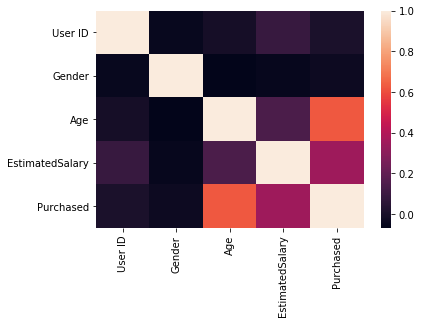

In [282]:
sns.heatmap(dataframe.corr())

In [283]:
dataframe.drop(['User ID'], axis=1,inplace=True)

In [284]:
cols = (dataframe.columns).drop(['Gender','Purchased'])

In [285]:
for each in cols:
    ss = StandardScaler()
    dataframe[each] = ss.fit_transform((np.asarray(dataframe[each]).reshape(-1,1)))
    with open('pickle/'+'K4model'+'_'+each+'.pkl','wb') as f:
        pickle.dump(ss,f)

/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [286]:
dataframe.head()

,Gender,Age,EstimatedSalary,Purchased
175,0,-1.392844,-1.218937,0
384,0,1.823837,-1.073044,1
6,0,-1.014411,0.415066,0
9,0,-0.257545,-0.139328,0
260,0,-0.257545,0.210816,0


In [287]:
ss = StandardScaler()
dataframe['Gender']=ss.fit_transform(np.asarray(dataframe["Gender"]).reshape(-1,1))

/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [288]:
dataframe.head()

,Gender,Age,EstimatedSalary,Purchased
175,-1.0,-1.392844,-1.218937,0
384,-1.0,1.823837,-1.073044,1
6,-1.0,-1.014411,0.415066,0
9,-1.0,-0.257545,-0.139328,0
260,-1.0,-0.257545,0.210816,0


In [289]:
X_train = dataframe.drop(['Purchased'],axis=1)
Y_train = dataframe['Purchased']

In [290]:
svc = SVC(kernel='rbf',random_state=0)

In [291]:
svc.fit(X = X_train,y =Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [293]:
# n_jobs parameter if set to -1 tells to utilize all the CPU in machine to work faster
accuracy = cross_val_score(cv = 10, estimator=svc, X = X_train, y = Y_train )


/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/a

In [296]:
accuracy.mean()

0.9112398112398112